# Libraries

In [1]:
import os
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import soundfile as sf
import IPython.display as ipd

import librosa
import librosa.display
import librosa.effects
import librosa.feature

from tqdm import tqdm

from scipy.stats import skew, kurtosis, iqr
from scipy.signal import iirnotch, butter, lfilter

from IPython.display import Audio
from sklearn.decomposition import PCA, FastICA, NMF

# Data Loading

In [2]:
directory = "SignalSourceDataset"
audio_data = []

for audio_files in os.listdir(directory):
    audio_file = os.path.join(directory, audio_files)
    audio, sr = librosa.load(audio_file)
    audio_data.append((audio, sr, audio_files))

# Visualization

Waveforms

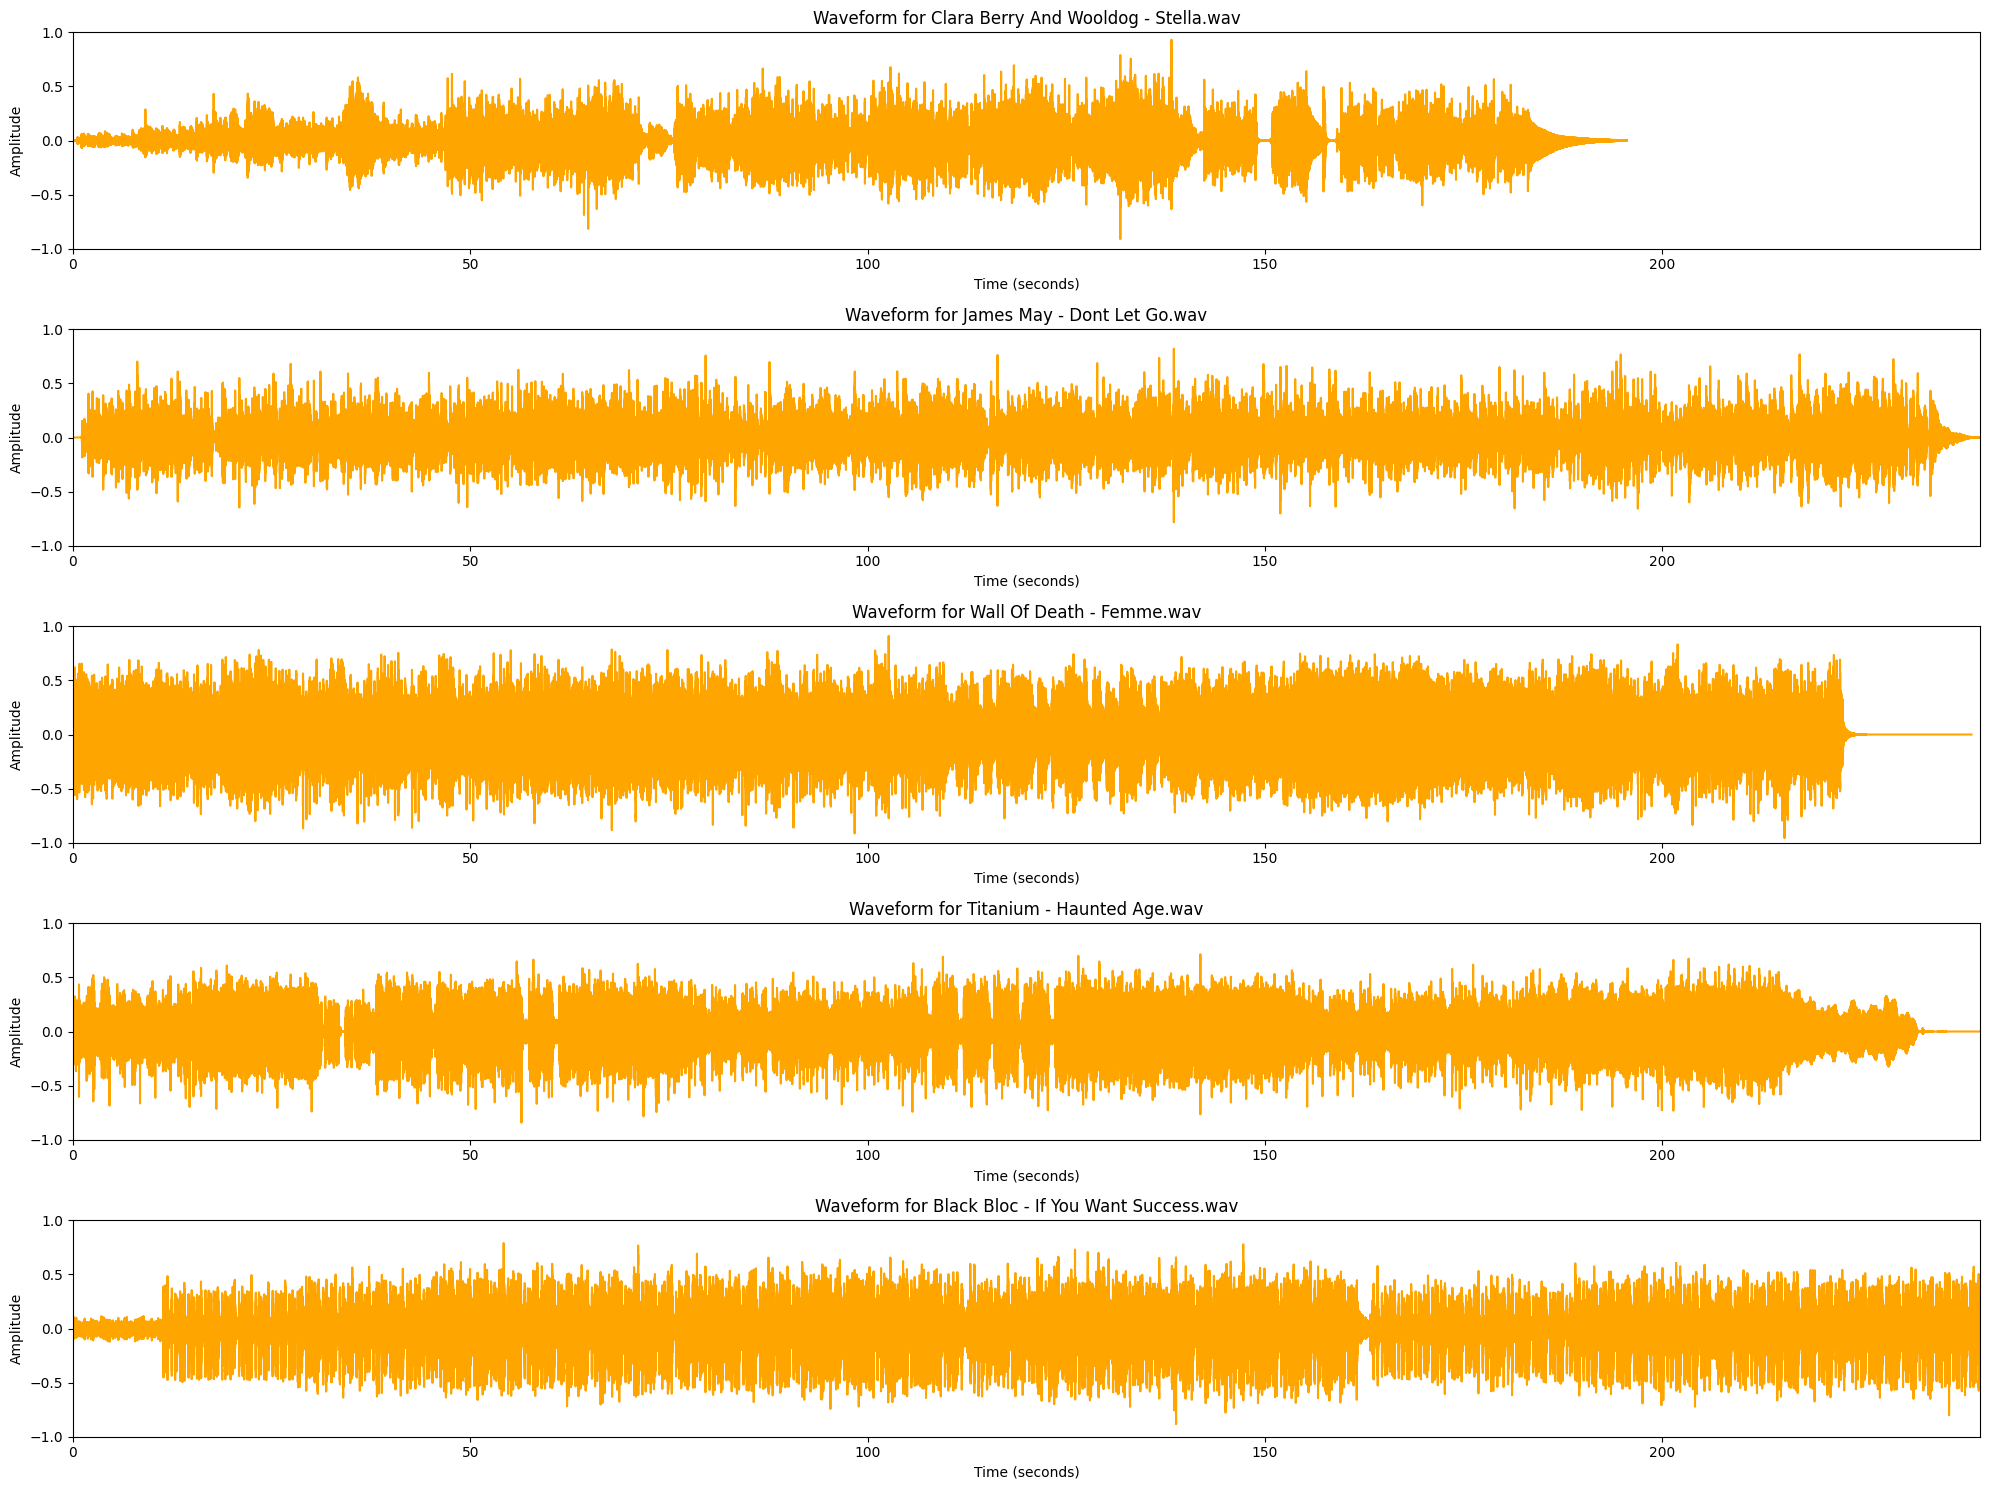

In [3]:
fig, axs = plt.subplots(5, 1, figsize=(20, 15))

for i, (audio, sr, audio_files) in enumerate(audio_data):
    times = np.arange(len(audio)) / float(sr)
    axs[i].plot(times, audio, color='orange')
    axs[i].set_title(f"Waveform for {audio_files}")

    axs[i].set_xlabel("Time (seconds)")
    axs[i].set_ylabel("Amplitude")

    axs[i].set_xlim([0, 240])
    axs[i].set_ylim([-1, 1])

plt.tight_layout()
plt.show()

Spectrogram

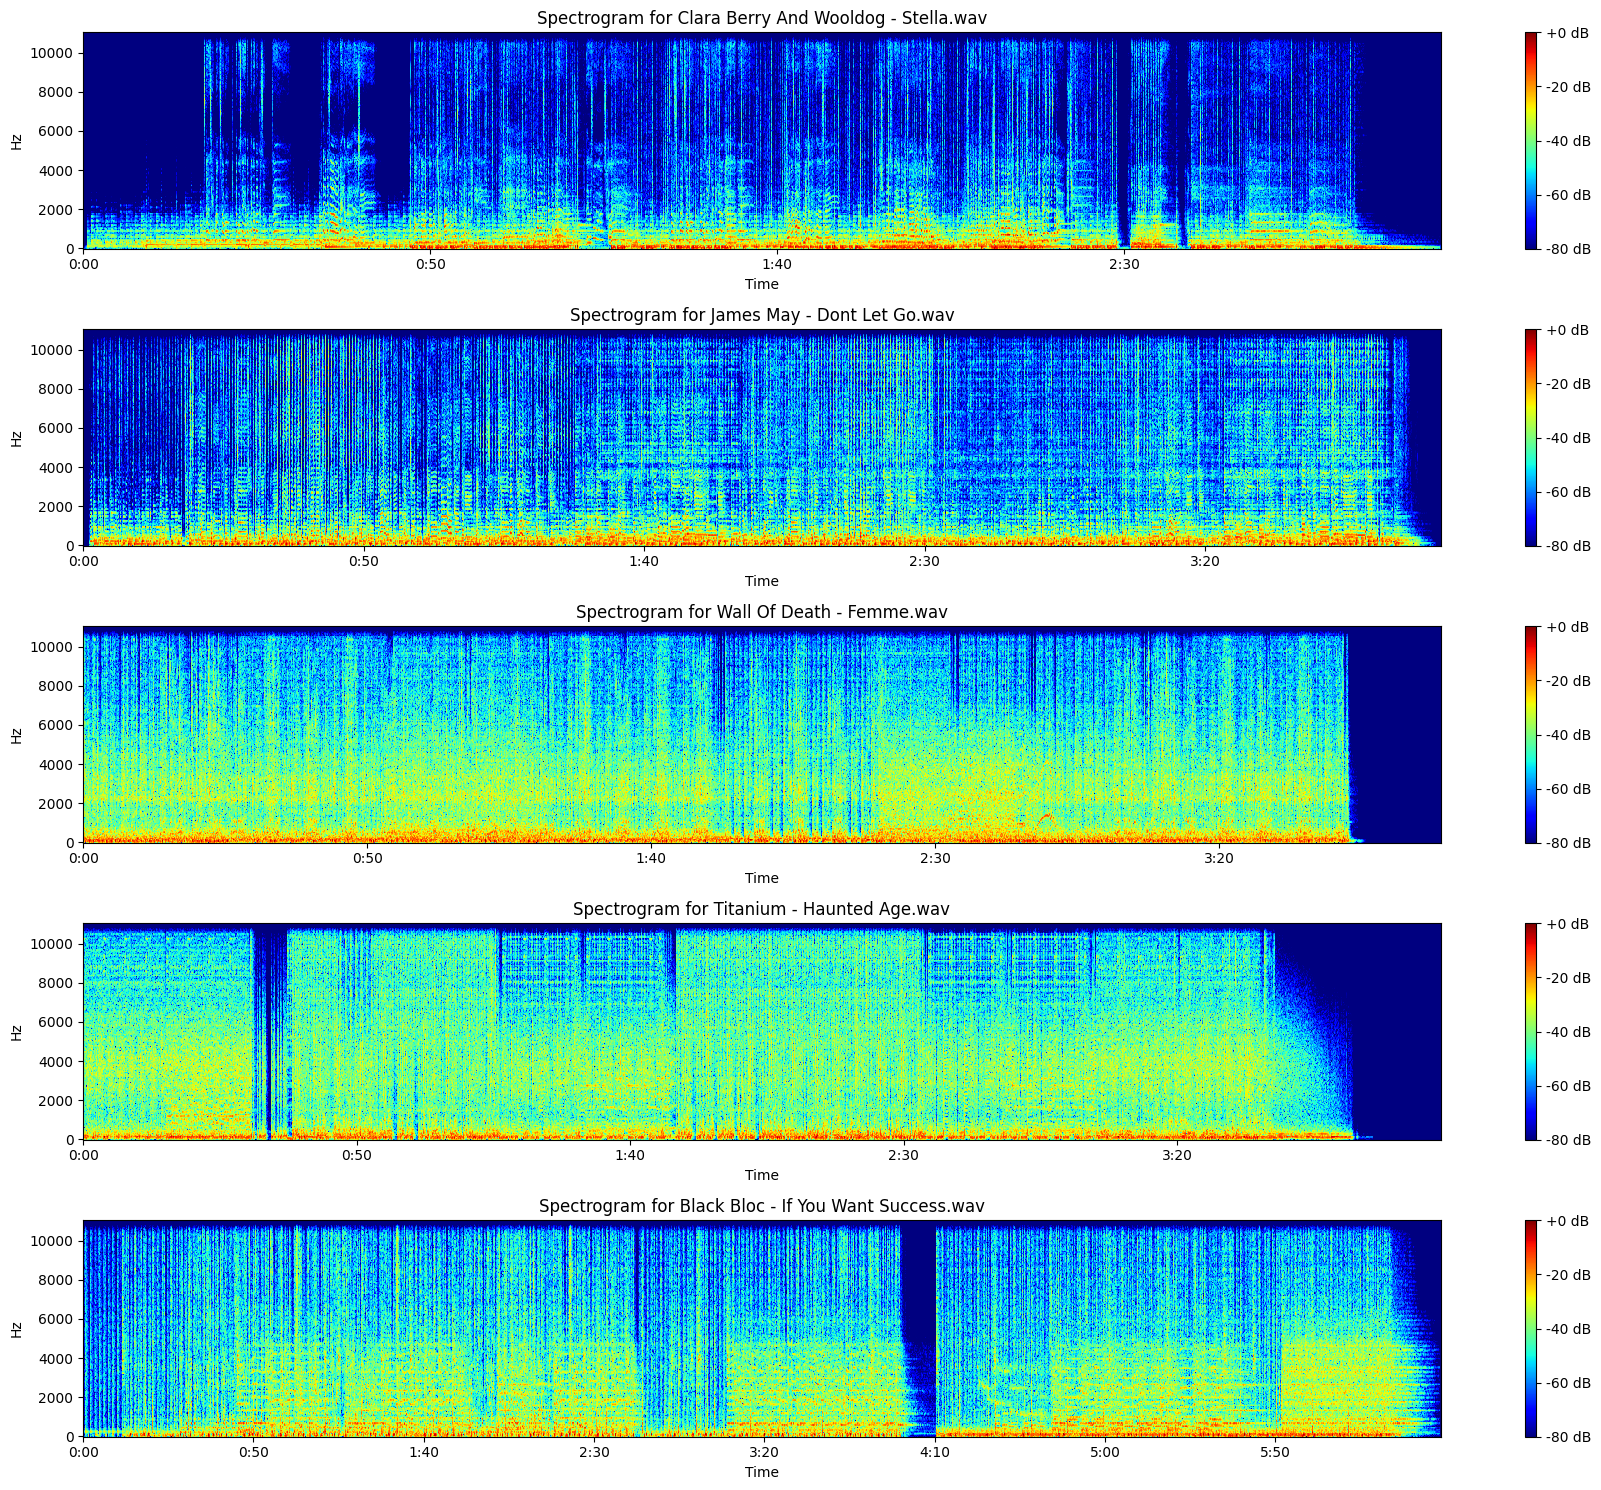

In [4]:
spectrogram_data = []

for audio, sr, audio_files in audio_data:
    sound_stft = librosa.stft(audio, n_fft=512, hop_length=256)
    Spec = librosa.amplitude_to_db(np.abs(sound_stft), ref=np.max)
    spectrogram_data.append((Spec, sr, audio_files))

fig, axs = plt.subplots(5, 1, figsize=(18, 15))

for i, (Spec, sr, audio_files) in enumerate(spectrogram_data):
    img = librosa.display.specshow(Spec, sr=sr, hop_length=256, x_axis='time', y_axis='hz', cmap=matplotlib.cm.jet, ax=axs[i])
    axs[i].set_title(f'Spectrogram for {audio_files}')
    plt.colorbar(img, ax=axs[i], format='%+2.0f dB')

plt.tight_layout()
plt.show()

Mel Frequency Cepstral Coefficients

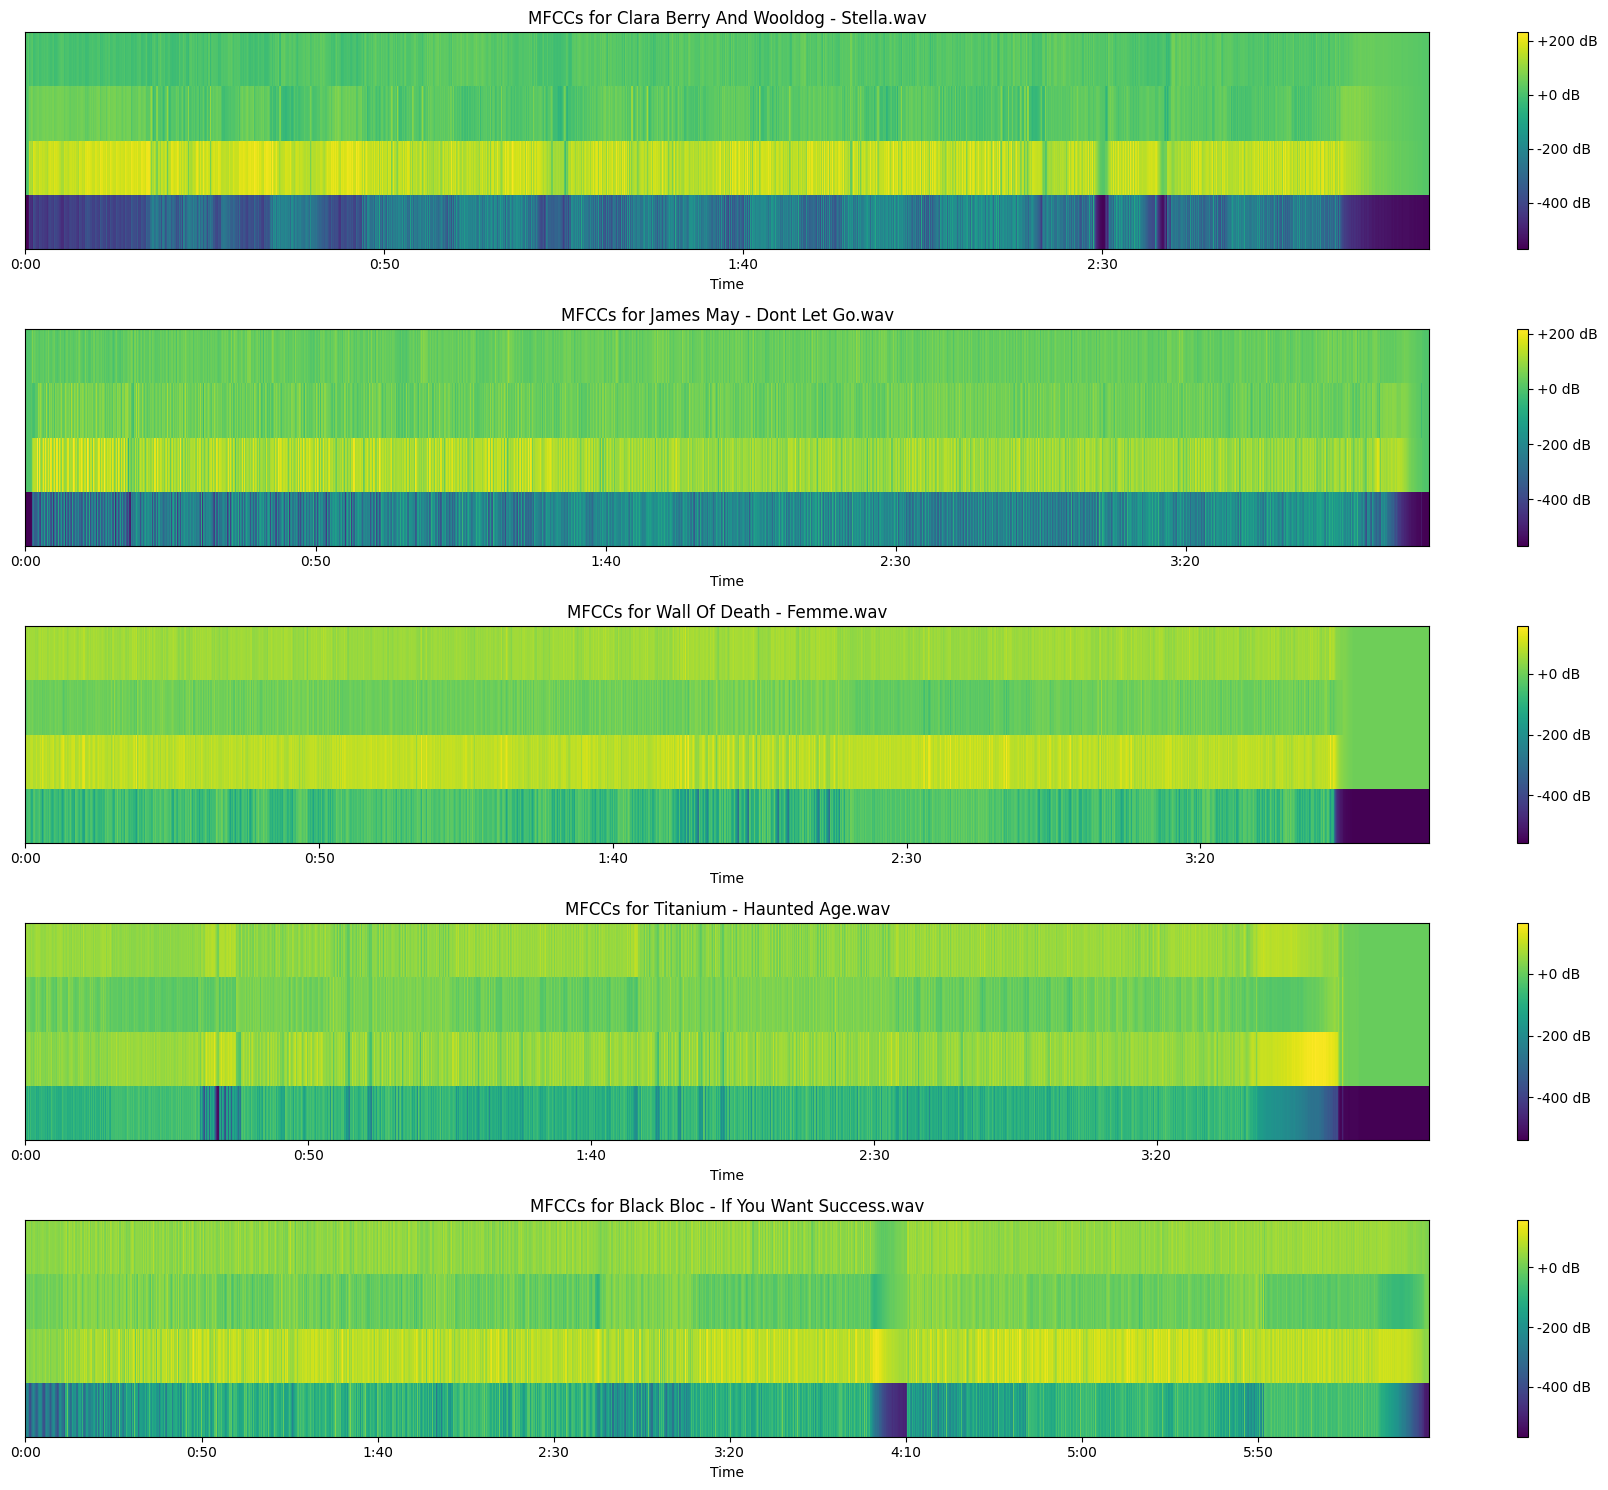

In [5]:
mfccs_data = []

for audio, sr, audio_files in audio_data:
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)
    mfccs_data.append((mfccs, audio_files))

fig, axs = plt.subplots(5, 1, figsize=(18, 15))

for i, (mfccs, audio_files) in enumerate(mfccs_data):
    mfccs = mfccs[:4, :]
    img = librosa.display.specshow(mfccs, x_axis='time', cmap='viridis', ax=axs[i])
    axs[i].set_title(f'MFCCs for {audio_files}')
    fig.colorbar(img, ax=axs[i], format='%+2.0f dB', orientation='vertical')

plt.tight_layout()
plt.show()